# Validation of the Poisson distribution
Validate that generated data comes from the Poisson distribution.

1. Generate poisson distribution dataset and obtain original coefficients on which the normal distribution was built.
2. Check that the generated dataset has these coefficients close enough to the original ones.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import pytensor.tensor as tt

from app import Generator

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
g = Generator(n_rows=2500,
     n_columns=200,
     informative_ratio=0.75,
     distribution='poisson',
)

df = g.generate_data()

# PyMC Poisson
Use the PyMC module to obtain the original coefficients.

In [4]:
model = pm.Model()

X = df.drop(columns=['y', 'y_exact'])
y = df['y']

with model:
    intercept = pm.Normal('Intercept', mu=0, sigma=10)
    coefficients = pm.Normal('beta', mu=0, sigma=10, shape=X.shape[1])
    
    mu = tt.exp(intercept + tt.dot(X, coefficients))
    y_obs = pm.Poisson('y_obs', mu=mu, observed=y)

    trace = pm.sample(200, tune=1000, target_accept=0.95)

coefficients_summary = pm.summary(trace)['mean']
print(coefficients_summary)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, beta]


Sampling 4 chains for 1_000 tune and 200 draw iterations (4_000 + 800 draws total) took 2565 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Intercept    0.612
beta[0]      0.000
beta[1]      0.333
beta[2]      0.938
beta[3]      0.656
             ...  
beta[195]    0.355
beta[196]    0.690
beta[197]   -0.002
beta[198]   -0.435
beta[199]    0.005
Name: mean, Length: 201, dtype: float64


## Comparison
Compare the original coefficients with the coefficients obtained with PyMC.

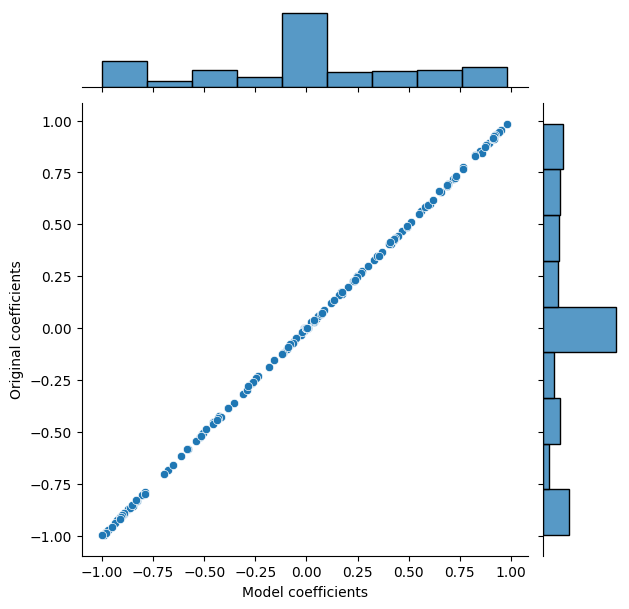

In [5]:
sns.jointplot(x=coefficients_summary.iloc[1:].tolist(), y=g.coef_)
plt.xlabel('Model coefficients')
plt.ylabel('Original coefficients')
plt.show()

As may be seen, PyMC was successful and the generated data comes from the poisson distribution.